In [1]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
import seaborn

import os
import json

import scipy.stats

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
alpha = 0.05
np.random.seed(999)
dist_n = np.random.randn(1000)

print ('normal on normal', scipy.stats.kstest(dist_n, 'norm'))
print ('normal on normal', scipy.stats.anderson(dist_n, 'norm'))
print('')

normal on normal KstestResult(statistic=0.016344431331899001, pvalue=0.95212890203293565)
normal on normal AndersonResult(statistic=0.26231814126674635, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))



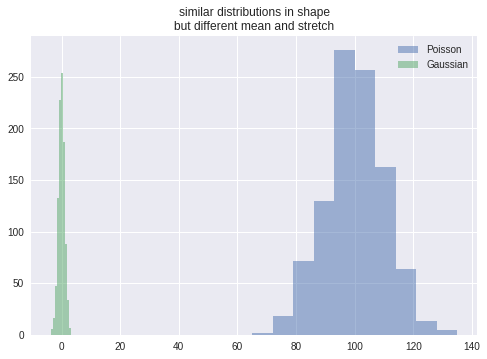

poisson on normal KstestResult(statistic=1.0, pvalue=0.0)
poisson on normal AndersonResult(statistic=0.72428815547550585, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In this case the means are different, so the distributions will be different for KS and AD test. I want a distribution with 'Poisson with high mean' shape cause that is more Gaussian but I want the mean to be the same as for my Gaussian: mean=0. Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1


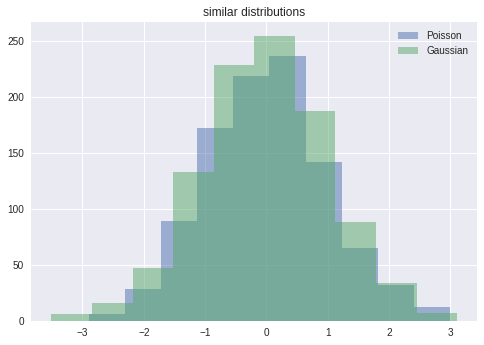

poisson vs normal KstestResult(statistic=0.030537538725986857, pvalue=0.30353169660170898)
poisson vs normal AndersonResult(statistic=0.92641226504883889, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
KS: no longer rejecting the H0 at alpha=0.05 (p~0.3)
AD: statistics AD=0.93 larger than threshold (for alpha=0.05) 
thresh_0.05 = 0.784 0.784


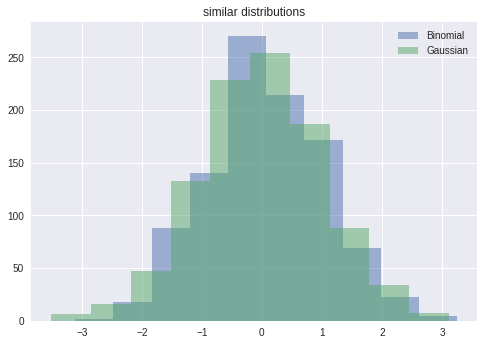

binomial vs normal KstestResult(statistic=0.049648705394760739, pvalue=0.013959864431395186)
binomial vs normal AndersonResult(statistic=1.1765054979813385, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
 what does the result of each test say??


In [3]:
np.random.seed(999)
# poisson with 1000 elements, lambda=100 (high)
dist_p = np.random.poisson(100, 1000)
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions in shape\nbut different mean and stretch")
pl.show()
print ("poisson on normal", scipy.stats.kstest(dist_p,'norm'))
print ("poisson on normal", scipy.stats.anderson(dist_p, dist='norm'))
print ("\n\nIn this case the means are different, " + 
       "so the distributions will be different for KS and AD test. " + 
       "I want a distribution with 'Poisson with high mean' shape cause that is more Gaussian " + 
       "but I want the mean to be the same as for my Gaussian: mean=0. "
       "Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1") 


dist_p = (np.random.poisson(100, 1000) - 100) * 0.1 #-100 fixes mean, *0.1 fixes stdev
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

print ("poisson vs normal", scipy.stats.kstest(dist_p,'norm'))
print ("poisson vs normal", scipy.stats.anderson(dist_p, dist='norm'))
print ("KS: no longer rejecting the H0 at alpha=0.05 (p~0.3)") 
print ("AD: statistics AD=0.93 larger than threshold (for alpha=0.05) ") 

threshold = scipy.stats.anderson(dist_n, 
                                 dist='norm')[1][scipy.stats.anderson(dist_n, 
                                                                      dist='norm')[2]==[5.0]]
print ("thresh_0.05 = 0.784", threshold[0])

#binomial with n=10, p=0.5 => mean=np=5, stdev=sqrt(np(1-p))
n, p = 200, 0.5
dist_b = (np.random.binomial(n, p, 1000) - n * p) / np.sqrt(n * p * (1 - p))  #subtract mean divide by stdev
pl.figure()
pl.hist(dist_b, alpha=0.5, label="Binomial")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

print ("binomial vs normal", scipy.stats.kstest(dist_b,'norm'))
print ("binomial vs normal", scipy.stats.anderson(dist_b, dist='norm'))
print (" what does the result of each test say??")


**KS Test**<br>
The null hypothesis for the KS test states that the two distributions measured are identical. Here, we are rejecting that hypothesis (due to the low p-value), and claiming that the two distributions are not identical.<br>
**Anderson Test**<br>
The null hyposthesis is very similar to the KS test (the Anderson gives more weight to the tails that the KS test, but is derived from it), in that it claims the two distributions are identical. We can reject this as well, given that our statistic is above our threshold for a 5% significance level.

In [4]:
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
distpdf_p, mybins_p, = np.histogram(dist_p, density=True)

In [5]:
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
bincenters_p = mybins_p[:-1] + 0.5*(mybins_p[1] - mybins_p[0])

print ('the KL test returns the "entropy". ' + 
       "To figure out what the number means thoug in terms of NULL rejection, help yourself " + 
       "with the fact that you know what the result should be for these three distributions!")
print ("normal on normal", 
    scipy.stats.entropy(distpdf_n, 
                            scipy.stats.norm.pdf(bincenters_n)) )
print ("poisson on normal", 
       scipy.stats.entropy(distpdf_p, 
                                scipy.stats.norm.pdf(bincenters_p)))

print ("binomial on normal", 
       scipy.stats.entropy(distpdf_b, 
                                scipy.stats.norm.pdf(bincenters_p)))

the KL test returns the "entropy". To figure out what the number means thoug in terms of NULL rejection, help yourself with the fact that you know what the result should be for these three distributions!
normal on normal 0.00527211066212
poisson on normal 0.00523311596851
binomial on normal 0.013732307361


## Binomial

In [6]:
np.random.seed(42)
narray = range(1,501,5)
ad_b = [0]*len(narray)
kl_b = [0]*len(narray)
for i,n in enumerate(narray):
    p = 0.5
    dist = (np.random.binomial(n, p, 1000) - n * p ) / np.sqrt(n * p * (1-p))
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    distpdf, mybins, = np.histogram(dist, density=True)
    bincenters = mybins[:-1] + 0.5*(mybins[1] - mybins[0])
    kl_b[i] =  scipy.stats.entropy(distpdf, scipy.stats.norm.pdf(bincenters))

np.random.seed(42)
nnarray = range(1,501,15)
ks_s_b = [0]*len(nnarray)
ks_p_b = [0]*len(nnarray)
for i,n in enumerate(nnarray):
    p = 0.5
    dist = (np.random.binomial(n, p, 1000) - n * p ) / np.sqrt(n * p * (1-p))
    ks_s_b[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_b[i] = scipy.stats.kstest(dist,'norm')[1]

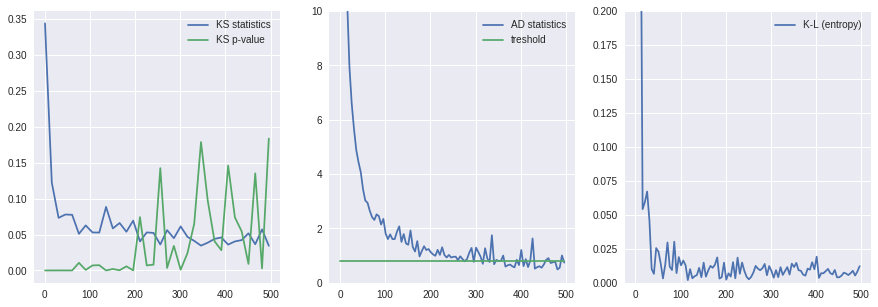

In [8]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(nnarray, ks_s_b, label='KS statistics')
pl.plot(nnarray, ks_p_b, label='KS p-value')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

fig.add_subplot(133)
pl.plot(range(1,501,5), kl_b, label='K-L (entropy)')
pl.ylim(0,0.2)
pl.legend();

**Description**<br>
These charts depict the tendancy for Binomial Distributions to tend towards Guassian with as they stray from zero and have increasing number of samples. The KS test begins to fail at rejecting the null hypothesis at around n=200. The AD test crosses the threshold not too far after at around 300, and the K-L entropy test plumits rapidly.

## Poisson

In [9]:
np.random.seed(42)
narray = range(1,251,6)
ad_p = [0]*len(narray)
kl_p = [0]*len(narray)
ks_s_p = [0]*len(narray)
ks_p_p = [0]*len(narray)
for i,lam in enumerate(narray):
    dist = (np.random.poisson(lam, 1000) - lam) / np.sqrt(lam)
    ad_p[i] = scipy.stats.anderson(dist, dist='norm')[0]
    distpdf, mybins, = np.histogram(dist, density=True)
    bincenters = mybins[:-1] + 0.5*(mybins[1] - mybins[0])
    kl_p[i] =  scipy.stats.entropy(distpdf, scipy.stats.norm.pdf(bincenters))
    ks_s_p[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_p[i] = scipy.stats.kstest(dist,'norm')[1]

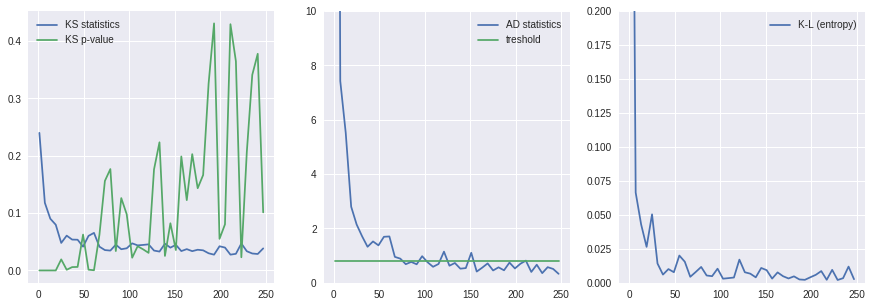

In [10]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_s_p, label='KS statistics')
pl.plot(narray, ks_p_p, label='KS p-value')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_p,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_p, label='K-L (entropy)')
pl.ylim(0,0.2)
pl.legend();

**Description**<br>
These charts depict the tendancy for Poisson Distributions to tend towards Guassian as lambda increases. It is much quicker to do so than the binomial, approaching the point of rejecting the null hypothesis on all tests before lambda=100.

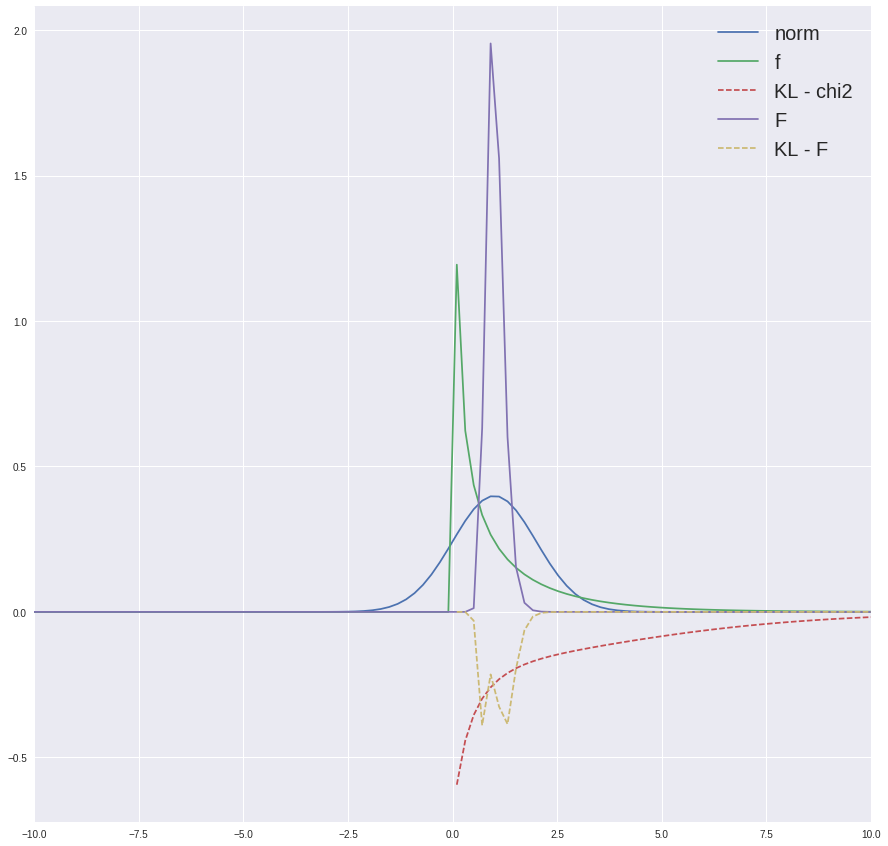

In [11]:
pl.figure(figsize=(15,15))

q = lambda x, mu : scipy.stats.distributions.norm.pdf(x - mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x, 100, 100)

Dkl = lambda x ,mu, p :  p(x, mu) * np.log10(q(x, mu)) + p(x, mu) * np.log10(p(x, mu))

def model(x) : 
    #gaussian model from scratch
    return 1. / (s * np.sqrt(2 * np.pi)) * np.exp(- ((x - m)**2 / 2. / s**2))

x = np.linspace(-10,10,100)
pl.plot(x, q(x, 1), label='norm')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))

pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, c))

pl.plot(x, f(x,1), label='F')
pl.plot(x, Dkl(x, 1, f), '--', label = 'KL - F')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, f))
bins = np.arange(0, 99, 10)

pl.xlim(-10, 10)
pl.legend(fontsize = 20);